In [1]:
import pandas as pd

airports = pd.read_csv("../../HumanImpact/airways/data/airports", delimiter=',', names=['id', 'name', 'city', 'country', 'iata', 
                                                                   'icao', 'lat', 'long', 'altitude', 'timezone',
                                                                   'dst', 'tz', 'type', 'source'])

In [2]:
print(airports)

         id                                         name          city  \
0         1                               Goroka Airport        Goroka   
1         2                               Madang Airport        Madang   
2         3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3         4                               Nadzab Airport        Nadzab   
4         5  Port Moresby Jacksons International Airport  Port Moresby   
...     ...                                          ...           ...   
7693  14106                          Rogachyovo Air Base        Belaya   
7694  14107                        Ulan-Ude East Airport      Ulan Ude   
7695  14108                         Krechevitsy Air Base      Novgorod   
7696  14109                  Desierto de Atacama Airport       Copiapo   
7697  14110                           Melitopol Air Base     Melitopol   

               country iata  icao        lat        long  altitude timezone  \
0     Papua New Guinea  GKA  AYG

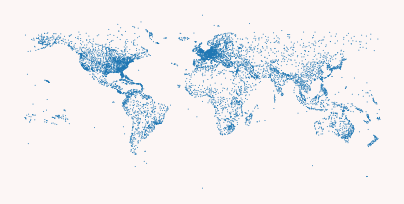

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

ax.scatter(airports['long'], airports['lat'], s=1, alpha=1, edgecolors='none')
ax.axis('off')

plt.savefig("outputs/raw1.png", dpi=600, bbox_inches='tight')
plt.show()

In [4]:
routes = pd.read_csv("../../HumanImpact/airways/data/routes", delimiter=',', names=['airline', 'id', 'source_airport', 'source_airport_id',
                                                               'destination_airport', 'destination_airport_id', 'codeshare',
                                                               'stops', 'equitment'])

In [5]:
print(routes)

      airline     id source_airport source_airport_id destination_airport  \
0          2B    410            AER              2965                 KZN   
1          2B    410            ASF              2966                 KZN   
2          2B    410            ASF              2966                 MRV   
3          2B    410            CEK              2968                 KZN   
4          2B    410            CEK              2968                 OVB   
...       ...    ...            ...               ...                 ...   
67658      ZL   4178            WYA              6334                 ADL   
67659      ZM  19016            DME              4029                 FRU   
67660      ZM  19016            FRU              2912                 DME   
67661      ZM  19016            FRU              2912                 OSS   
67662      ZM  19016            OSS              2913                 FRU   

      destination_airport_id codeshare  stops equitment  
0                

In [6]:
source_airports = airports[['name', 'iata', 'icao', 'lat', 'long']]
destination_airports = source_airports.copy()
source_airports.columns = [str(col) + '_source' for col in source_airports.columns]
destination_airports.columns = [str(col) + '_destination' for col in destination_airports.columns]

In [7]:
routes = routes[['source_airport', 'destination_airport']]
routes = pd.merge(routes, source_airports, left_on='source_airport', right_on='iata_source')
routes = pd.merge(routes, destination_airports, left_on='destination_airport', right_on='iata_destination')

In [8]:
routes['journey'] =  routes['iata_source'] + '_' + routes['iata_destination']

counts = routes.groupby(['journey']).size()
routes = routes.sort_values('journey')
counts = counts.sort_index()
counts = pd.DataFrame({'journey':counts.index, 'count':counts.values})
routes = pd.merge(routes, counts, on='journey')

In [9]:
import geopandas as gpd
from shapely.geometry import LineString

geometry = [LineString([[routes.iloc[i]['long_source'], routes.iloc[i]['lat_source']], [routes.iloc[i]['long_destination'], routes.iloc[i]['lat_destination']]]) for i in range(routes.shape[0])]
routes = gpd.GeoDataFrame(routes, geometry=geometry, crs='EPSG:4326')


In [14]:
print(routes.columns)

Index(['source_airport', 'destination_airport', 'name_source', 'iata_source',
       'icao_source', 'lat_source', 'long_source', 'name_destination',
       'iata_destination', 'icao_destination', 'lat_destination',
       'long_destination', 'journey', 'count', 'geometry'],
      dtype='object')


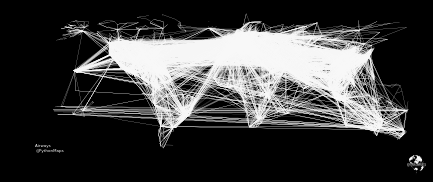

In [11]:

fig = plt.figure(facecolor='black')
ax = plt.axes()

fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('black')

routes.plot(ax=ax, color='white', linewidth=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')

logo = plt.imread('../../Branding/globe_black.png')
newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "Airways \n@PythonMaps",
              size=4,
              color='white',
              transform = ax.transAxes)

plt.savefig("outputs/raw2.png", dpi=600, bbox_inches='tight')
plt.show()

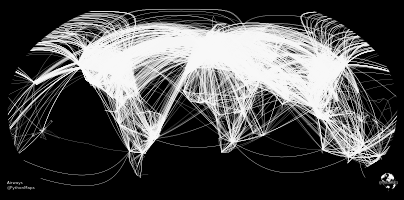

In [12]:
import cartopy.crs as ccrs

fig = plt.figure(facecolor='black')
ax = plt.axes(projection=ccrs.Robinson())
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('black')

routes.plot(ax=ax, transform=ccrs.Geodetic(), color='white', linewidth=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')

newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "Airways \n@PythonMaps",
              size=4,
              color='white',
              transform = ax.transAxes)
ax.set_ylim(-7000000, 8800000)

plt.savefig("outputs/raw3.png", dpi=600, bbox_inches='tight')
plt.show()

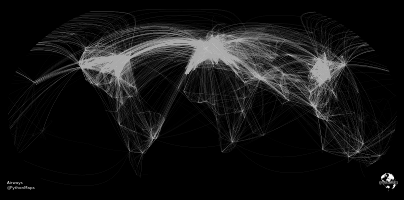

In [13]:
fig = plt.figure(facecolor='black')
ax = plt.axes(projection=ccrs.Robinson())
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('black')

routes.plot(ax=ax, transform=ccrs.Geodetic(), color='white', linewidth=0.1, alpha=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')

newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.0, 0.02, "Airways \n@PythonMaps",
              size=4,
              color='white',
              transform = ax.transAxes)
ax.set_ylim(-7000000, 8800000)

plt.savefig("outputs/raw4.png", dpi=600, bbox_inches='tight')
plt.show()